#**Deep Learning for Financial Crisis Prediction**
### Erica Trofimov & Luana Brugger
Universität St. Gallen, 20<sup>th</sup> November 2025

# 1. Introduction and Research Question

Financial crises are periods of sharp instability in financial markets, often characterized by falling asset prices, heightened volatility, and disruptions in liquidity and credit. Events such as the 2008 Global Financial Crisis and the 2020 COVID-19 shock have shown how quickly stress can spread across countries and across different asset classes. Because these episodes can cause long-lasting economic damage, understanding whether early patterns in financial indicators can help anticipate crisis periods remains an important topic for both researchers and market participants.

Machine learning models, especially sequence-based approaches like Recurrent Neural Networks (RNNs), are used more and more to analyze financial time series and detect subtle patterns that may not be visible through traditional econometric tools. In this project, we work with a multi-market dataset that includes daily stock-market metrics, bond-yield data, foreign-exchange indicators, and volatility measures for three countries, along with a binary label indicating whether each day corresponds to a crisis or a normal period. These features reflect many of the signals commonly monitored in real markets, making the dataset suitable for exploring crisis prediction.

Using this dataset, we aim to investigate whether **multi-market financial variables can be used to predict crisis periods using an RNN-based model**, and potentially support the development of future early-warning systems.

# 2. Dataset

## 2.1 Description
We base our analysis on a simulated public Domain *Multi-Market Financial Crisis Dataset*, which captures multi-market financial indicators that can be used to analyse financial crisis and economic stability.
It focuses on daily data for 3 markets, that are USA, UK and JAPAN. The time coverage is 1000 days for each country, ranging from 2020-01-01 to 2022-09-26
The dataset is in CSV format and can be retrieved on Kaggle at the following website: https://www.kaggle.com/datasets/ziya07/multi-market-financial-crisis-dataset.

The dataset contains a 3000 x 13 array, and the 13 different variables are respectively:
- **Date**: in YYYY/MM/DD format, it ranges from 2020-01-01 to 2022-09-26 for each country
- **Country**: with 3 unique values that are USA, UK and Japan.
- **Stock_Index**: includes simulated stock market index values
- **Stock_Return**: gives the daily percentage change in stock index
- **Stock_volatility**: the standard deviation of stock returns every 5 days
- **Bond_Yield**: simulated 10-year government bond yield
- **Bond_Yield_Spread**: gives the difference between long-term and short-term yields
- **Bond_Volatility**: simulated volatility in bond yields
- **FX_Rate**: simulated currency exchange rate
- **FX_Return**: gives the daility percentage change in exchange rate
- **FX_Volatility**: standard deviation of stock returns every 5 days
- **VIX**: a simulated volatility index representing market stress
- **Crisis_Label**: a binary variable indicating 0 as Normal setting and 1 as a Crisis setting.

The Crisis_Label column will be our target variables, while the other ones will be the features for our predictive model.


## 2.2 Motivation of the choice
This dataset is particularly suitable for our research goal as it comprehends a set of diverse variables, spanning from financial market features such as Stock Market indicators, Bond Market indicators and Foreign Exchange indicators, to more macroeconomics features, such as the Bond-Yield Spread and VIX. This will allow us to better explore whether a deep learning model could learn early warning signals of financial crisis across different markets.

A convenient aspect of this dataset is also that the target variable `Crisis_Label` is in binary type, hence it already specifies whether the corresponding market was experiencing a crisis on a given day (1) or not (0). This binary label allows us to frame the problem with binary classification.

## 2.3 Relevant datasets in the literature
Various cross-country datasets have been used by the research community to assess and predict financial crisis, such as (Laeven & Valencia, 2020). (Lin et al., 2012) accurately lists accurately lists various country specific datasets used in the literature to predict bankruptcy and credit scoring.



> Laeven, L., Valencia, F. Systemic Banking Crises Database II. IMF Econ Rev 68, 307–361 (2020). https://doi.org/10.1057/s41308-020-00107-3
> Lin, W.-Y., Hu, Y.-H., & Tsai, C.-F. (2012). Machine learning in financial crisis prediction: A survey. IEEE Transactions on Systems, Man, and Cybernetics, Part C (Applications and Reviews), 42(4), 421–436. https://doi.org/10.1109/TSMCC.2011.2170420








## 2.4 Pre-Processing
We start by importing the relevant packages for the pre-processing of the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We proceed by loading the dataset, examining it and checking if it has missing values or duplicated ones. Since it is a time sequential dataset, we also check if it is correctly ordered by date.

In [2]:
data = pd.DataFrame()
data = pd.read_csv('Financial_Crisis.csv')

display(data.head())
print(data.info())

,Date,Country,Stock_Index,Stock_Return,Stock_Volatility,Bond_Yield,Bond_Yield_Spread,Bond_Volatility,FX_Rate,FX_Return,FX_Volatility,VIX,Crisis_Label
0,2020-01-01,USA,1002.483571,0.000000,0.000000,1.569968,0.319078,0.015683,0.993248,0.000000,0.000000,15.047097,0
1,2020-01-02,USA,1001.792249,-0.068961,0.000000,1.546232,0.308604,0.019844,0.998555,0.534267,0.000000,15.698042,0
2,2020-01-03,USA,1005.030692,0.323265,0.000000,1.502982,0.304136,0.020090,0.992076,-0.648839,0.000000,23.821365,0
3,2020-01-04,USA,1012.645841,0.757703,0.000000,1.467653,0.281123,0.022363,0.996920,0.488328,0.000000,18.588396,0
4,2020-01-05,USA,1011.475074,-0.115615,0.366071,1.534911,0.294434,0.013166,0.981064,-1.590551,0.891436,17.423889,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3000 non-null   object 
 1   Country            3000 non-null   object 
 2   Stock_Index        3000 non-null   float64
 3   Stock_Return       3000 non-null   float64
 4   Stock_Volatility   3000 non-null   float64
 5   Bond_Yield         3000 non-null   float64
 6   Bond_Yield_Spread  3000 non-null   float64
 7   Bond_Volatility    3000 non-null   float64
 8   FX_Rate            3000 non-null   float64
 9   FX_Return          3000 non-null   float64
 10  FX_Volatility      3000 non-null   float64
 11  VIX                3000 non-null   float64
 12  Crisis_Label       3000 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 304.8+ KB
None


In [3]:
print("Missing values:")
print(data.isnull().sum())
print(f'There are {data.duplicated().sum()} duplicate values.')

data = data.sort_values(by=['Date', 'Country'])
data.reset_index(drop=True, inplace=True)
data.head()

data["Date"] = pd.to_datetime(data["Date"])

Missing values:
Date                 0
Country              0
Stock_Index          0
Stock_Return         0
Stock_Volatility     0
Bond_Yield           0
Bond_Yield_Spread    0
Bond_Volatility      0
FX_Rate              0
FX_Return            0
FX_Volatility        0
VIX                  0
Crisis_Label         0
dtype: int64
There are 0 duplicate values.


## Crisis indicator variable

We will take a look at our Y variable between the different countries to see if we can get any relevant information. For that we will plot a graph.

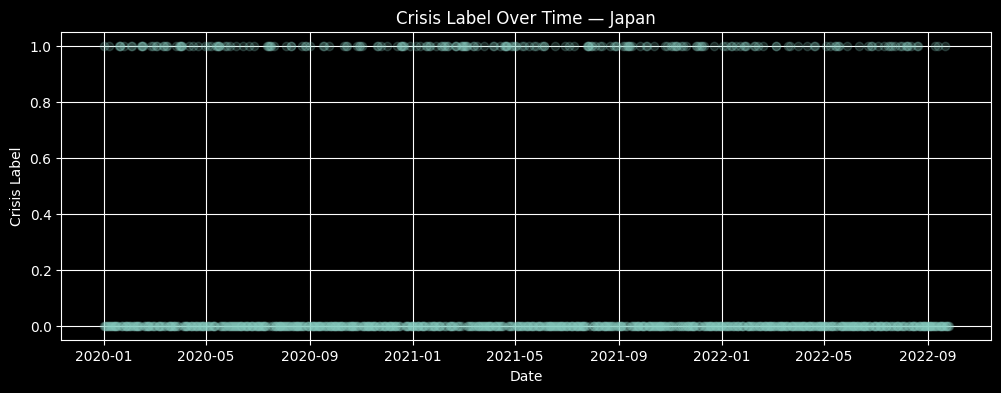

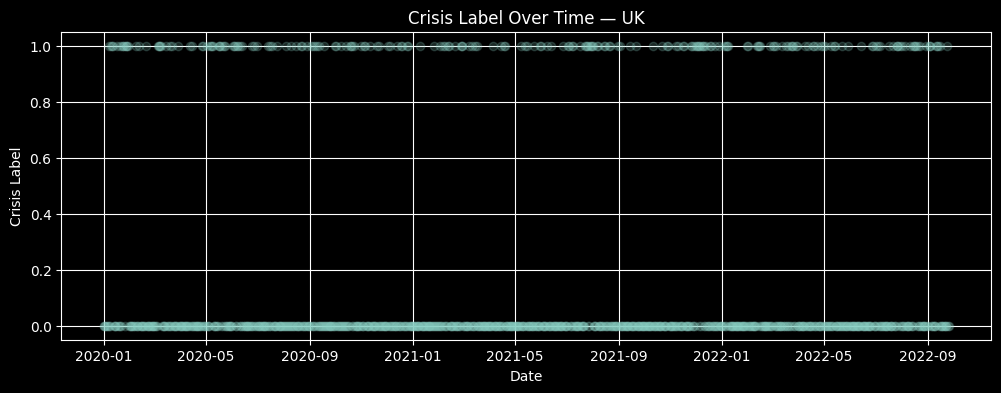

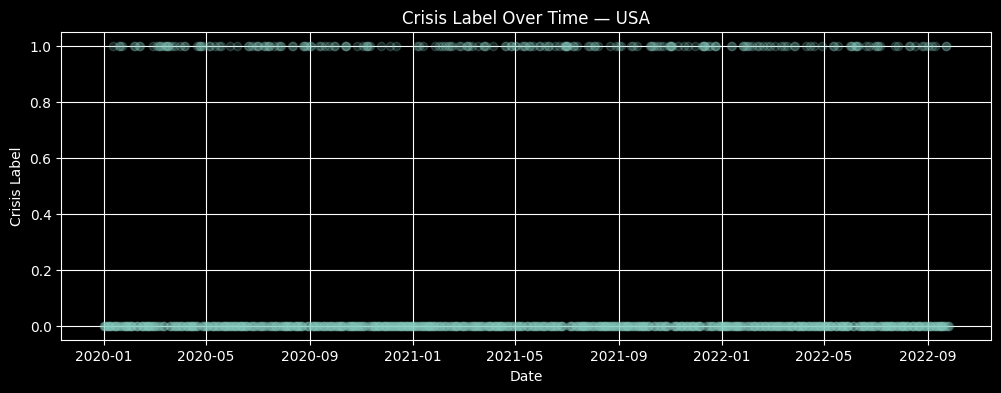

In [4]:
countries = data["Country"].unique()

for country in countries:
    country_data = data[data["Country"] == country]

    plt.figure(figsize=(12, 4))
    plt.plot(
        country_data["Date"],
        country_data["Crisis_Label"],
        marker="o",
        alpha=0.2,
        linestyle="None"
    )
    plt.title(f"Crisis Label Over Time — {country}")
    plt.xlabel("Date")
    plt.ylabel("Crisis Label")
    plt.grid(True)
    plt.show()


There are a few things we can see from the graph, even though because of the nature of the variable it is not the clearest graph:
- We can see that our dataset it unbalanced, with moments with a crisis being a lot more rare than moments without a crises;
- It is not completely uniform, there are moments with several days with crisis in a row and then none.
- The three countries have several similaries and we can see some correlation among the moments of crises between the countries.

Since the dataset includes information about three different countries, and these markets may have heterogeneous and group-specific dynamics, it is important to define how our model will handle this structure. One option would also be to build a separate crisis-prediction model for each country, but the dataset is already small, and splitting it would prevent us from capturing cross-country correlations. In reality, global markets are highly interconnected, and financial crises rarely affect only one country-stress signals often propagate across borders. A country-by-country model would fail to capture these relationships.

At the same time, training a single unified model without indicating the country would ignore market-specific behavior. Including a country feature will allow the model to adapt to each market’s characteristics while still learning shared patterns associated with crisis periods.



In [5]:
# Add specific Country columns
data = pd.get_dummies(data, columns=['Country'], drop_first=False)
dummy_cols = ['Country_USA', 'Country_UK', 'Country_Japan']
data[dummy_cols] = data[dummy_cols].astype(int)

# Modified dataset
data.head()
data.info()
data[['Country_USA', 'Country_UK', 'Country_Japan']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3000 non-null   datetime64[ns]
 1   Stock_Index        3000 non-null   float64       
 2   Stock_Return       3000 non-null   float64       
 3   Stock_Volatility   3000 non-null   float64       
 4   Bond_Yield         3000 non-null   float64       
 5   Bond_Yield_Spread  3000 non-null   float64       
 6   Bond_Volatility    3000 non-null   float64       
 7   FX_Rate            3000 non-null   float64       
 8   FX_Return          3000 non-null   float64       
 9   FX_Volatility      3000 non-null   float64       
 10  VIX                3000 non-null   float64       
 11  Crisis_Label       3000 non-null   int64         
 12  Country_Japan      3000 non-null   int64         
 13  Country_UK         3000 non-null   int64         
 14  Country_

,Country_USA,Country_UK,Country_Japan
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


We can now split the dataset into features and the target label.


In [6]:
# Split the data into features and target
features = data.drop("Crisis_Label", axis=1)
target = np.array(data["Crisis_Label"])

In [7]:
# Check how features looks like
features

,Date,Stock_Index,Stock_Return,Stock_Volatility,Bond_Yield,Bond_Yield_Spread,Bond_Volatility,FX_Rate,FX_Return,FX_Volatility,VIX,Country_Japan,Country_UK,Country_USA
0,2020-01-01,1002.150715,0.000000,0.000000,1.478263,0.305077,0.024596,0.984939,0.000000,0.000000,35.386850,1,0,0
1,2020-01-01,1002.286621,0.000000,0.000000,1.502893,0.288165,0.014451,1.001080,0.000000,0.000000,16.053987,0,1,0
2,2020-01-01,1002.483571,0.000000,0.000000,1.569968,0.319078,0.015683,0.993248,0.000000,0.000000,15.047097,0,0,1
3,2020-01-02,1004.693391,0.253722,0.000000,1.425240,0.313410,0.014703,0.995822,1.104970,0.000000,34.547141,1,0,0
4,2020-01-02,1012.777729,1.046717,0.000000,1.486720,0.311647,0.021616,1.026069,2.496180,0.000000,12.116029,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-09-25,827.162258,0.731856,0.326673,1.480694,0.304577,0.013767,0.992653,-0.564143,1.148217,30.342175,0,1,0
2996,2022-09-25,1093.797365,-0.260419,0.513148,1.491847,0.283566,0.024040,1.003342,1.595752,1.262797,20.569267,0,0,1
2997,2022-09-26,1016.960545,0.298611,0.520585,1.538060,0.302895,0.020666,1.008609,-0.775492,1.116568,34.075061,1,0,0
2998,2022-09-26,827.206200,0.005312,0.346383,1.550761,0.289285,0.011845,1.009559,1.703119,1.305015,30.536333,0,1,0


In [8]:
# Check how target looks like
target

array([1, 0, 0, ..., 0, 0, 0], shape=(3000,))

And decide the indexes at which the dataset will be splitted in a train set, a set for validation and a test set. We split the data using index ranges rather than random sampling to preserve the temporal structure of the series. These preprocessing steps allow the network to learn temporal patterns and ensure that future information never leaks into the past during training.

In [9]:
# Decide the number of samples for train, validation and test sets
num_train = int(0.7 * len(data))
num_val =int(0.2 * len(data))
num_test = int(0.1 * len(data))

The data is almost ready for the next steps.
However, the dataset comprehends features with different scales and distributions, and this can lead a model to be biased towards features with larger magnitudes. Hence, it is appropriate to normalize the data:
$x_{normalized} = \frac{x-\mu}{\sigma}$,
where $\mu$ and $\sigma$ are the mean and standard deviation of the feature,
respectively.

In [10]:
# Specify the columns that should not be normalised
non_norm_features = features[["Date", "Country_USA", "Country_UK", "Country_Japan"]]
norm_columns = [c for c in features.columns if c not in non_norm_features]

#Calculate the mean and the standard devations only on the train subset
means = features.loc[:num_train, norm_columns].mean(0)
stds = features.loc[:num_train, norm_columns].std(0)

# Apply normalization to the whole dataset
features[norm_columns] = (features[norm_columns] - means) / stds
features

,Date,Stock_Index,Stock_Return,Stock_Volatility,Bond_Yield,Bond_Yield_Spread,Bond_Volatility,FX_Rate,FX_Return,FX_Volatility,VIX,Country_Japan,Country_UK,Country_USA
0,2020-01-01,0.400404,0.009761,-2.679100,-0.458652,0.517417,0.943157,-1.496150,-0.008864,-2.594550,1.187642,1,0,0
1,2020-01-01,0.403152,0.009761,-2.679100,0.017520,-1.185925,-1.110359,0.087445,-0.008864,-2.594550,-0.991425,0,1,0
2,2020-01-01,0.407134,0.009761,-2.679100,1.314276,1.927549,-0.861119,-0.680932,-0.008864,-2.594550,-1.104915,0,0,1
3,2020-01-02,0.451809,0.500433,-2.679100,-1.483751,1.356658,-1.059339,-0.428369,0.766534,-2.594550,1.092996,1,0,0
4,2020-01-02,0.615250,2.034003,-2.679100,-0.295150,1.179088,0.339998,2.539145,1.742798,-2.594550,-1.435285,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-09-25,-3.137330,1.425095,-0.881274,-0.411651,0.467044,-1.248828,-0.739302,-0.404744,-0.543086,0.619041,0,1,0
2996,2022-09-25,2.253221,-0.493862,0.144981,-0.196043,-1.649044,0.830660,0.309367,1.110935,-0.338373,-0.482494,0,0,1
2997,2022-09-26,0.699814,0.587245,0.185911,0.697394,0.297653,0.147615,0.826157,-0.553055,-0.599634,1.039786,1,0,0
2998,2022-09-26,-3.136442,0.020035,-0.772801,0.942952,-1.073050,-1.637991,0.919389,1.186278,-0.262944,0.640925,0,1,0


In [11]:
# Split the data
# Train set
x_train = features[ : num_train]
y_train = target[: num_train]

# Validation set
x_val = features[num_train : num_train + num_val]
y_val = target[num_train : num_train + num_val]

# Test set
x_test = features[num_train + num_val : ]
y_test = target[num_train + num_val : ]

In [12]:
#Check how x_train looks like
x_train

,Date,Stock_Index,Stock_Return,Stock_Volatility,Bond_Yield,Bond_Yield_Spread,Bond_Volatility,FX_Rate,FX_Return,FX_Volatility,VIX,Country_Japan,Country_UK,Country_USA
0,2020-01-01,0.400404,0.009761,-2.679100,-0.458652,0.517417,0.943157,-1.496150,-0.008864,-2.594550,1.187642,1,0,0
1,2020-01-01,0.403152,0.009761,-2.679100,0.017520,-1.185925,-1.110359,0.087445,-0.008864,-2.594550,-0.991425,0,1,0
2,2020-01-01,0.407134,0.009761,-2.679100,1.314276,1.927549,-0.861119,-0.680932,-0.008864,-2.594550,-1.104915,0,0,1
3,2020-01-02,0.451809,0.500433,-2.679100,-1.483751,1.356658,-1.059339,-0.428369,0.766534,-2.594550,1.092996,1,0,0
4,2020-01-02,0.615250,2.034003,-2.679100,-0.295150,1.179088,0.339998,2.539145,1.742798,-2.594550,-1.435285,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2021-11-29,-2.764413,0.805714,-0.162806,-0.256388,-0.581922,1.132696,-0.334179,0.720923,2.399915,1.650992,0,1,0
2096,2021-11-29,-0.200789,0.932981,-0.244897,0.458356,-0.933712,0.140680,0.591826,1.366547,0.348668,-0.166601,0,0,1
2097,2021-11-30,2.243310,0.769847,0.836863,-0.446536,-0.283260,0.783490,0.813421,1.332915,0.513016,0.924749,1,0,0
2098,2021-11-30,-2.969381,-2.308876,0.815201,0.247243,0.444454,-0.235991,-0.050368,0.194784,2.366197,-0.561875,0,1,0


The data is now ready to be used for building and training the predictive model.

# 3. Methodology

In this section, we describe the modeling pipeline used in our project. We begin by structuring the data for a sequential learning approach and then implement our primary model, a Recurrent Neural Network (RNN). After training the RNN, we will introduce two simpler benchmarks, a feedforward neural network and a logistic regression model, to compare whether the use of temporal sequences improves predictive performance.

Before defining the RNN architecture, we first prepare the data in a format suitable for sequence-based learning. This involves converting the original time-ordered observations into fixed-length input windows using Keras’ `timeseries_dataset_from_array` to automatically generate training, validation, and testing sequences. Each sequence contains 10 consecutive periods of features, paired with the crisis label that follows that window.

In [ ]:
# Importing the needed libraries:

import sklearn
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
np.random.seed(346)

In [14]:
# Prepare time series data for training, validation and testing in keras
sequence_length = 10
batch_size = 200

features_array = features.drop(columns=["Date"]).values

train_dataset = keras.utils.timeseries_dataset_from_array(
    features_array[:-sequence_length,:],
    targets=target,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train)

val_dataset = keras.utils.timeseries_dataset_from_array(
    features_array[:-sequence_length,:],
    targets=target,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train,

    end_index=num_train + num_val)

test_dataset = keras.utils.timeseries_dataset_from_array(
    features_array[:-sequence_length,:],
    targets=target,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train + num_val)

## 3.1 Building the Recurrent Neural Network

After preparing the data, we define and train our recurrent model. The network takes sequences of length 10 as input and processes them using a `SimpleRNN` layer with 100 hidden units, allowing the model to extract temporal patterns from consecutive observations. A fully connected layer with ReLU activation is added to introduce non-linearity, followed by a single sigmoid neuron that outputs the predicted probability of a crisis event.

We compile the model using the Adam optimizer and binary cross-entropy loss, as this is a binary classification task. To retain the best-performing model, we include a `ModelCheckpoint` callback that saves the version achieving the highest validation accuracy during training. The model is then trained using the previously defined training and validation datasets, and after training, we reload the checkpointed weights to evaluate final performance on the train, validation, and test sets.


In [15]:
def create_and_train_model(
    lr=0.001,
    epochs=10,
    verbose=0
  ):
    inputs = keras.Input(shape=(sequence_length, features_array.shape[-1]))
    x = keras.layers.SimpleRNN(100)(inputs)
    x = keras.layers.Dense(200, activation="relu")(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)

    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "lob_lstm.keras",
            save_best_only=True
        )
    ]

    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss="binary_crossentropy",metrics=["accuracy"])
    history = model.fit(
        train_dataset,
        epochs=epochs,
        validation_data=val_dataset,
        callbacks=callbacks,
        verbose=verbose
    )
    model = keras.models.load_model("lob_lstm.keras")
    print (f"Train accuracy: { model.evaluate (train_dataset)[1]:.4f}")
    print (f"Validation accuracy: { model.evaluate (val_dataset)[1]:.4f}")
    print (f"Test accuracy: {model.evaluate(test_dataset)[1]:.4f}")
    return model, history

To monitor how the model learns over time, we include a plotting function that displays the evolution of both the loss and accuracy during training. Using the history object returned by Keras, we extract the training and validation metrics recorded at each epoch and visualize them in two subplots: one for loss and one for accuracy. These plots allow us to assess whether the model is converging, identify signs of overfitting, such as validation metrics diverging from training metrics, and verify the overall stability of the training process.

In [16]:
# Function for plotting the results
def training_plot(history):
    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "b-", label="Training loss")
    plt.plot(epochs, val_loss, "g-", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, "b-", label="Training accuracy")
    plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show();

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7719 - loss: 0.5510 - val_accuracy: 0.7834 - val_loss: 0.5051
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7800 - loss: 0.4864 - val_accuracy: 0.7868 - val_loss: 0.4825
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8006 - loss: 0.4316 - val_accuracy: 0.8173 - val_loss: 0.4139
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8393 - loss: 0.3479 - val_accuracy: 0.8426 - val_loss: 0.3352
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8642 - loss: 0.3036 - val_accuracy: 0.8646 - val_loss: 0.3126
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8809 - loss: 0.2722 - val_accuracy: 0.8765 - val_loss: 0.3034
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8919 - loss: 0.2467 - val_accuracy: 0.8680 - val_loss: 0.2900
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9101 - loss: 0.2169 - val_accuracy: 0.8663 - va

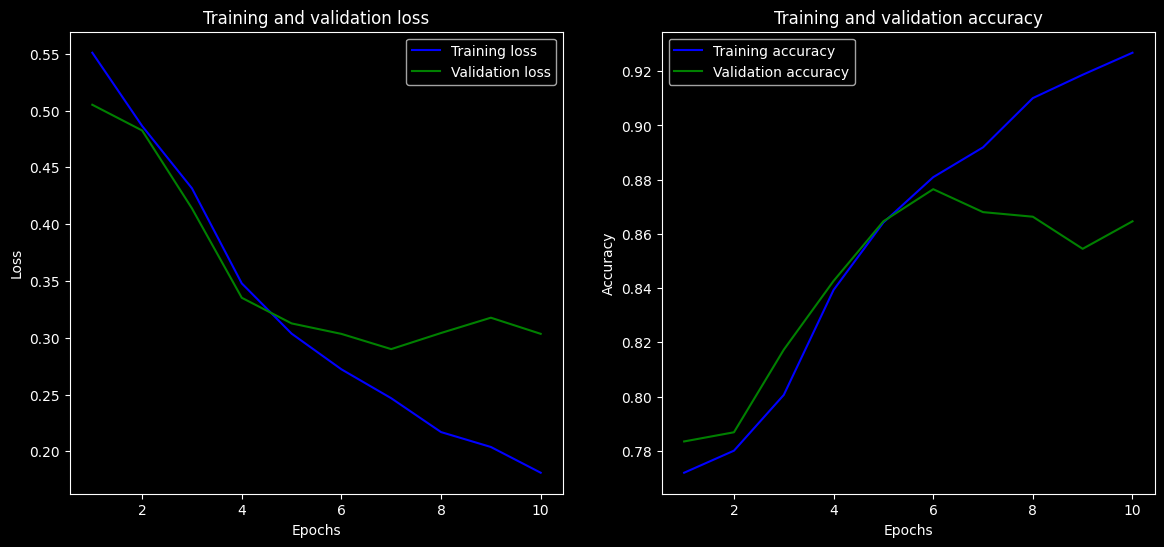

In [17]:
model, history = create_and_train_model(verbose=1)
training_plot(history)

The training curves suggest mild overfitting, but not to a degree that destabilizes the model. Training loss continues to decrease steadily, while validation loss plateaus and slightly increases after around epoch 7–8. Similarly, training accuracy keeps rising, while validation accuracy levels off. This pattern indicates that the model has essentially extracted the useful temporal signal available in the data by that point, and additional epochs primarily fit noise in the training set.

Given this behavior, training for fewer epochs, around 7 instead of 10, would likely yield comparable or even slightly better generalization performance.

Epoch 1/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7111 - loss: 0.5876 - val_accuracy: 0.7834 - val_loss: 0.5265
Epoch 2/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7791 - loss: 0.5029 - val_accuracy: 0.7834 - val_loss: 0.4935
Epoch 3/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7896 - loss: 0.4454 - val_accuracy: 0.7919 - val_loss: 0.4312
Epoch 4/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8307 - loss: 0.3674 - val_accuracy: 0.8223 - val_loss: 0.3739
Epoch 5/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8594 - loss: 0.3182 - val_accuracy: 0.8511 - val_loss: 0.3349
Epoch 6/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8771 - loss: 0.2829 - val_accuracy: 0.8613 - val_loss: 0.3132
Epoch 7/7
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.2598 - val_accuracy: 0.8596 - val_loss: 0.3006
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9072 - loss: 0.2394  
Train accuracy: 0.9072
3/3 ━━━━━━━━━━━━━━━━

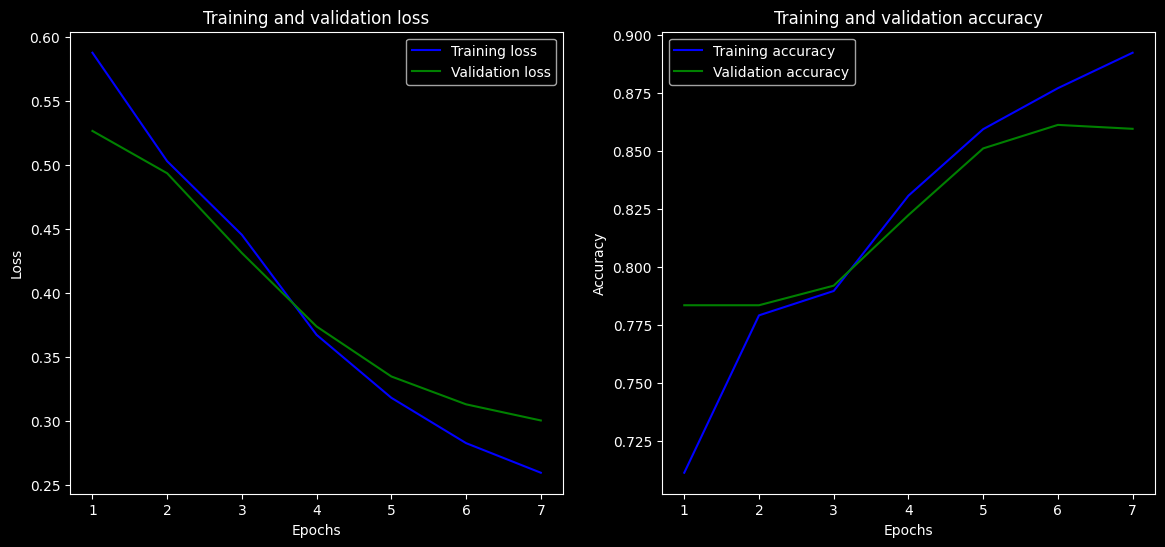

In [18]:
model, history = create_and_train_model(epochs = 7, verbose=1)
training_plot(history)

Reducing training to 7 epochs leads to a more balanced learning curve. Training and validation loss decrease almost in parallel, and training/validation accuracy remain very close throughout the process. This indicates minimal overfitting, especially compared to the 10-epoch model where validation performance plateaued earlier.

These results indicate that 7 epochs is close to the optimal training duration for this RNN architecture, given the stability of the validation metrics and the absence of divergence between training and validation curves.

## 4. Comparison

We proceed to apply simpler methods such as Logistic Regression and Feedforward Neural Networks to the dataset, in order to assess whether Recurrent Neural Networks provide be a more accurate model for predicting financial crises in this specific setting. Logistic Regression and FNN are generally not well suited for time-series data, as they assume independent and fixed-size inputs. Hence, we would expect the RNN model to outperform them. In this chapter, we build the models employing `keras` and `sklearn`.

## 4.1 Logistic Regression
We start by building the Logistic Regression for the dataset.

In [19]:
x_train = x_train.drop(columns=["Date"])
x_val = x_val.drop(columns=["Date"])
x_test = x_test.drop(columns=["Date"])

# Apply the logistic regression to the training subset
reg = LogisticRegression(fit_intercept=True).fit(x_train, y_train)

print(f'The train accuracy is {reg.score(x_train, y_train)}')
print(f'The validation accuracy is {reg.score(x_val, y_val)}')
print(f'The test accuracy is {reg.score(x_test, y_test)}')

The train accuracy is 0.8747619047619047
The validation accuracy is 0.91
The test accuracy is 0.8433333333333334


A simple Logistic Regression model seems to perform with similar train, validation and test accuracy of the more complex Recurrent Neural Network in terms of accuracy.\
A possibile explaination to this phenomenon would be the small sample size of the dataset, with just around 3000 observations. Recurrent Neural Networks are powerful when dealing with large sequential datasets in order for them to learn temporal dependencies details about the problem. In the case of small datasets, a simpler model could outperform a complex one on accuracy because it does not overfit as easily.

Another possibility would be that the dataset is imbalanced. The binary target Crisis_label has a high amount of 0 (normal) and fewer 1 (crisis), and a simple logistic regression that predicts mostly 0 can get high accuracy without really understanding the crises.

Another possibile argument in favor of the accuracy of Logistic Regression regards the type of data we are dealing with. Many financial early warning indicators are linearly correlated to crisis probability. In that case, a simple logistic regression could already provide a good performance, while a RNN could add to much complexity.

## 4.2 Feedforward NN
We then apply a more complex model to the dataset, though it treats observations as independent to each other and may not be optimal for time series.
We specify a Feedforward Neural Network.The model we build has 3 layers of weight. The input dimension $N_0=13$ units, the dimension of the two hidden layers is respectively $N_1 = 50$ and $N_2 = 100$, and in both these two layers a ReLU is employed as activation function. The last output layer gives a binary values as output and employs a sigmoid as activation function. We also include two droput layers with 0.2 rate  that will randomly deactivate 20% of neurons during training, with the aim of reducing overfitting.

The`compile` method allows us to prepare f for training.
In this part, we specify a binary crossentropy as loss function, having to deal with a binary classification type of problem, and use an Adam optimizer like done above. The model will see the entire training data 20 times, and it will process 128 samples from `x_train` at a time.




In [20]:
f = keras.Sequential()
f.add(keras.layers.Dense(50,activation="relu",input_shape=(x_train.shape[1],)))
f.add(keras.layers.Dropout(0.2)),
f.add(keras.layers.Dense(100,activation="relu"))
f.add(keras.layers.Dropout(0.2)),
f.add(keras.layers.Dense(1,activation="sigmoid"))

learning_rate = 0.001
f.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history = f.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7352 - loss: 0.5821 - val_accuracy: 0.7867 - val_loss: 0.4933
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7805 - loss: 0.4886 - val_accuracy: 0.7883 - val_loss: 0.4279
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8110 - loss: 0.4235 - val_accuracy: 0.8517 - val_loss: 0.3644
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8390 - loss: 0.3819 - val_accuracy: 0.8750 - val_loss: 0.3098
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.3507 - val_accuracy: 0.8950 - val_loss: 0.2742
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3185 - val_accuracy: 0.8983 - val_loss: 0.2542
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3049 - val_accuracy: 0.9083 - val_loss: 0.2380
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8814 - loss: 0.2827 - val_accuracy: 0.9117 - val_loss: 0.2240
Ep

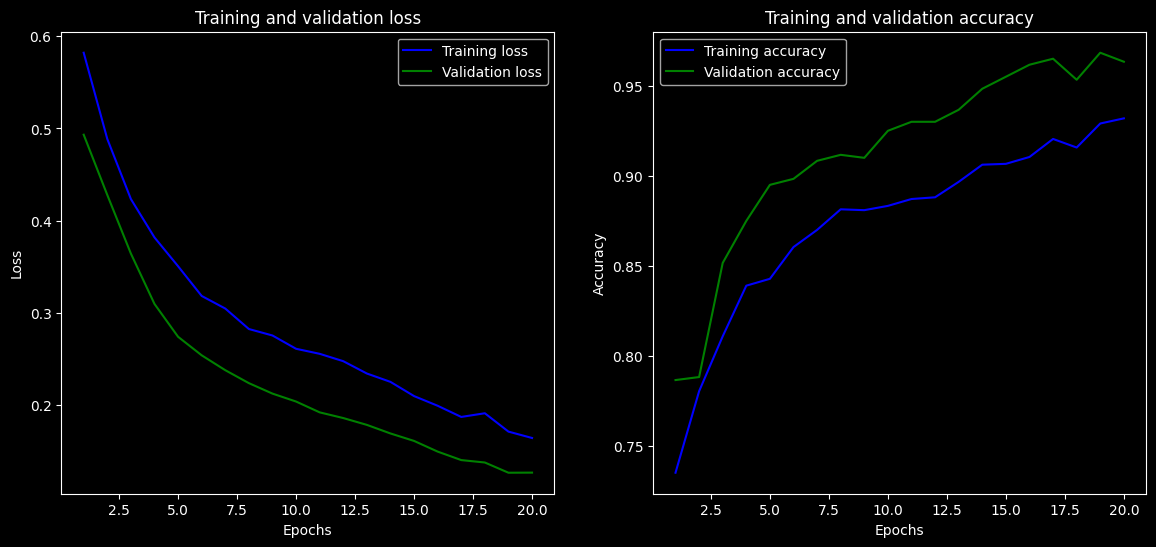

The test accuracy is: 0.91


/var/folders/8s/5j_bqklj4t119zclwwt3s80r0000gq/T/ipykernel_96554/4159375764.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = [int(prob>0.5) for prob in pred]


In [21]:
training_plot(history)
pred = f.predict(x_test,verbose = 0)
pred = [int(prob>0.5) for prob in pred]
res = [int(pred[i]==y_test[i]) for i in range(len(y_test))]
print(f"The test accuracy is: {sum(res)/len(res)}")

As a results, Feedforward Neural Networks seem to achieve a higher accuracy than both the RNN and Logistic regression. This could be because of the non-linearity of neural networks, which allows to capture non-linear dependencies compared to a simple Logistic Regression.\
As already stated, it could be possible that RNN adds complexity to the problem without adding too much signal, and could be slightly worse at generalizing on unseen datasets compared to FNN and Logistic Regression.\
Another option, as already addressed, could be that the dataset is too imbalanced. Hence, both the Logistic Regression and FNN could perform accurately at predicting non-crisis situations but could may not be good at predicting crises.

It could be beneficial to use different metrics to assess each model's predictive performance, such as precision, F1-score and Confusion Matrices.

# 5. Conclusion

The objective of this project was to test whether an RNN could outperform simpler models in predicting financial crises. Based on our results, this **expectation did not hold**: the RNN performed reasonably well, but both Logistic Regression and especially the Feedforward Neural Network matched or exceeded its accuracy. The FNN ultimately achieved the best results.

This outcome suggests that, for our dataset, non-linear relationships mattered more than temporal dependencies, and the RNN’s sequential structure did not add meaningful predictive power. Several factors may explain this:

- Dataset size: With only around 3,000 observations, the RNN may not have had enough data to learn complex temporal patterns.

- Label imbalance: Crisis events are rare, meaning models can achieve high accuracy by focusing on the majority class, limiting the benefit of more sophisticated architectures.

- Weak observable temporal signal in our sample: Crisis indicators may not change enough within short windows to allow the RNN to extract a strong sequential pattern. We also tested a longer window (30 periods), but this performed worse and showed clear overfitting, likely because the limited dataset cannot support such long sequences. With more data, longer windows could potentially capture richer temporal information.

- We could also have tried different parameters and changes in the RNN, such as adding drop-out layers (as we did in the FNN), having more or less hidden layers, among others.

Despite these limitations, the project highlights an important insight: **more complex models do not necessarily outperform simpler ones**, especially in small, imbalanced financial datasets where the temporal signal may be weak or overshadowed by linear and non-linear relationships easily captured by simpler models.

In short, our results show that the added complexity of an RNN did not translate into better predictive performance in this context, and simpler models, particularly feedforward networks, proved more effective.